In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons()

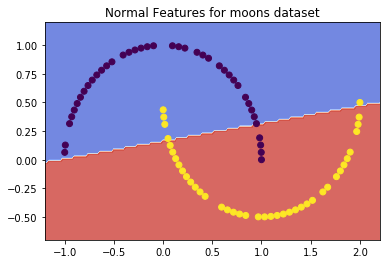

In [2]:
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

def fitAndPlot(X, y, a = 0, b = 1):
    log_reg = LogisticRegression(C=1e5, max_iter=100)
    log_reg.fit(X, y)
    h = .02
    x_min, x_max = X[:, a].min() - 1, X[:, a].max() + 1
    y_min, y_max = X[:, b].min() - 1, X[:, b].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = log_reg.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, a],X[:, b],c=y)
    plt.xlim(-1.2,2.2)
    plt.ylim(-0.7,1.2)
    plt.title("Normal Features for moons dataset")

fitAndPlot(X_train, y_train)

In [3]:
poly_feat = PolynomialFeatures(degree=3)
X_poly = poly_feat.fit_transform(X_train)

In [4]:
X_train[0]

array([0.07308324, 0.124733  ])

In [5]:
poly_feat.powers_ #[power of feature 1, power of feature 2, ..., power of feature n]
#feature_1*pow_1*feature_2*pow_2*...*feature_n*pow_n

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2],
       [3, 0],
       [2, 1],
       [1, 2],
       [0, 3]])

In [6]:
X_poly[0]

array([1.00000000e+00, 7.30832427e-02, 1.24732995e-01, 5.34116036e-03,
       9.11589175e-03, 1.55583201e-02, 3.90349318e-04, 6.66218929e-04,
       1.13705248e-03, 1.94063586e-03])

In [13]:
X_train[0, 0]**1*X_train[0, 1]**1

0.009115891749358193

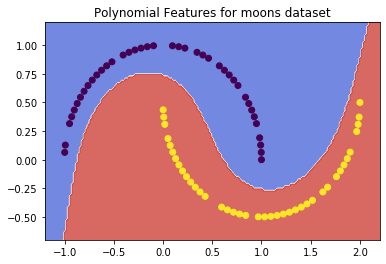

In [7]:
def fitAndPlotThreePoly(X, y):
    log_reg = LogisticRegression(C=1e5, max_iter=100)
    log_reg.fit(X, y)
    h = .02
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = log_reg.predict(np.c_[np.ones(len(xx_r)), xx_r, yy_r,
                                      xx_r**2, xx_r*yy_r, yy_r**2,
                                      xx_r**3, xx_r**2*yy_r,xx_r*yy_r**2, yy_r**3])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 1],X[:, 2],c=y)
    plt.xlim(-1.2,2.2)
    plt.ylim(-0.7,1.2)
    plt.title("Polynomial Features for moons dataset")
fitAndPlotThreePoly(X_poly, y_train)